In [1]:
import os

os.chdir("../")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR

import torch_optimizer as optimizer
from galaxy.config import settings

import galaxy.models.spinalnet_resnet as spinalnet_resnet
import galaxy.models.effnet as effnet
import galaxy.models.densenet as densenet
import galaxy.models.spinalnet_vgg as spinalnet_vgg
import galaxy.models.vitL16 as vitL16
import galaxy.models.alexnet_vgg as alexnet_vgg
import galaxy.models.resnet18 as resnet18
import galaxy.models.baseline as baseline
from galaxy import metrics, segmentation, data

from galaxy.train import Trainer
from galaxy.data import DataPart
# import data.segmentation as segmentation
# import metrics.metrics as metrics

from comet_ml import Experiment



all_models = [
    # ('Baseline', baseline),
    # ('ResNet18', resnet18),
    # ('EfficientNet', effnet),
    # ('DenseNet', densenet),
    # ('SpinalNet_ResNet', spinalnet_resnet),
    # ('SpinalNet_VGG', spinalnet_vgg),
    ('ViTL16', vitL16),
    # ('AlexNet_VGG', alexnet_vgg)
]

all_optimizers = [
    ('SGD', optim.SGD),
    ('Rprop', optim.Rprop),
    ('Adam', optim.Adam),
    ('NAdam', optim.NAdam),
    ('RAdam', optim.RAdam),
    ('AdamW', optim.AdamW),
    #('Adagrad', optim.Adagrad),
    ('RMSprop', optim.RMSprop),
    #('Adadelta', optim.Adadelta),
    ('DiffGrad', optimizer.DiffGrad),
    # ('LBFGS', optim.LBFGS)
]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
datasets, dataloaders = data.create_dataloaders()

train_loader = dataloaders[DataPart.TRAIN]
val_loader = dataloaders[DataPart.VALIDATE]
test_loader = dataloaders[DataPart.TEST]


# parser = argparse.ArgumentParser(description='Model training')
# parser.add_argument('--models', nargs='+', default=['ResNet18', 'EfficientNet', 'DenseNet', 'SpinalNet_ResNet', 'SpinalNet_VGG', 'ViTL16', 'AlexNet_VGG'],
#                     help='List of models to train (default: all)')
# parser.add_argument('--epochs', type=int, default=5, help='Number of epochs to train (default: 5)')
# parser.add_argument('--lr', type=float, default=0.0001, help='Learning rate for optimizer (default: 0.0001)')
# parser.add_argument('--mm', type=float, default=0.9, help='Momentum for optimizer (default: 0.9)')
# parser.add_argument('--optimizer', choices=[name for name, _ in all_optimizers], default='Adam', help='Optimizer to use (default: Adam)')

# args = parser.parse_args()

# selected_models = [(model_name, model) for model_name, model in models if model_name in args.models]

# num_epochs = args.epochs
# lr = args.lr
# momentum = args.mm
# optimizer_name = args.optimizer


INFO: Query finished. [astroquery.utils.tap.core]


/home/matvei/projects/galaxyHackers/galaxy/data.py:697: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame = pd.concat([clusters, non_clusters, random], ignore_index=True)
/home/matvei/projects/galaxyHackers/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Train Counts: {'is_cluster_1': 5483, 'source_rand': 1178, 'source_sga': 1210, 'is_cluster_0_stars': 2188}
Test Counts: {'is_cluster_1': 1796, 'source_rand': 402, 'source_sga': 400, 'is_cluster_0_stars': 755}
Grabbing part train
Started grabbing
503
Grabbing part validate
Started grabbing
168
Grabbing part test
Started grabbing
168
Grabbing part bright_stars
Started grabbing
100


In [2]:
selected_models = all_models[:1]

num_epochs = 200
lr = 1e-4
momentum = 0.9
optimizer_name = "Adam"

experiment = Experiment(
    api_key=settings.COMET_API_KEY,
    project_name="cluster-search",
    workspace=settings.COMET_WORKSPACE,
    auto_param_logging=False,
)

experiment.log_parameters(
    {
        "models": [name for name, _ in selected_models],
        "num_epochs": num_epochs,
        "momentum": momentum,
        "optimizer": optimizer_name,
    }
)


# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()

results = {}
val_results = {}

classes = ('random', 'clusters')


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/pyatachokk/cluster-search/b17b374bf8fd4199b163326990ab4abe



model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Finding optimal learning rate...
Step 70/70 | LR: 1.00E-01 | Loss: 56.2500 | Avg Loss: 45.1778
Finished finding learning rate.


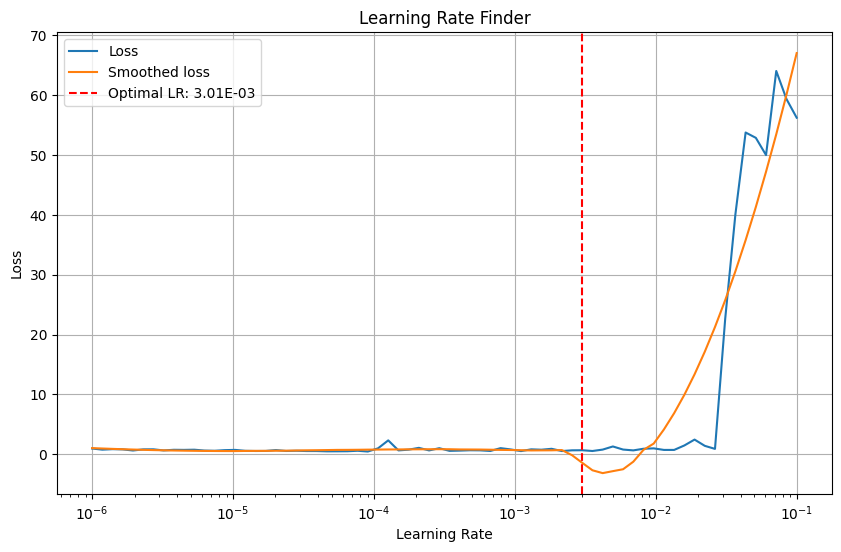


Training: Epoch 1/200
Batch 158/158 | Loss: 0.5556 | Accuracy: 0.7299
Validation: Epoch 1/200
Batch 53/158 | Loss: 0.5556 | Accuracy: 0.7299
New best model saved with val_loss=0.7196

Training: Epoch 2/200
Batch 158/158 | Loss: 0.3273 | Accuracy: 0.8558
Validation: Epoch 2/200
Batch 53/158 | Loss: 0.3273 | Accuracy: 0.8558
New best model saved with val_loss=0.2703

Training: Epoch 3/200
Batch 158/158 | Loss: 0.2615 | Accuracy: 0.8859
Validation: Epoch 3/200
Batch 53/158 | Loss: 0.2615 | Accuracy: 0.8859

Training: Epoch 4/200
Batch 158/158 | Loss: 0.2526 | Accuracy: 0.8942
Validation: Epoch 4/200
Batch 53/158 | Loss: 0.2526 | Accuracy: 0.8942
New best model saved with val_loss=0.2585

Training: Epoch 5/200
Batch 158/158 | Loss: 0.2384 | Accuracy: 0.9019
Validation: Epoch 5/200
Batch 53/158 | Loss: 0.2384 | Accuracy: 0.9019
New best model saved with val_loss=0.2308

Training: Epoch 6/200
Batch 158/158 | Loss: 0.2187 | Accuracy: 0.9075
Validation: Epoch 6/200
Batch 53/158 | Loss: 0.2187

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : protective_soup_3497
COMET INFO:     url                   : https://www.comet.com/pyatachokk/cluster-search/b17b374bf8fd4199b163326990ab4abe
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     ViTL16_Adam_train_acc [31800]  : (0.46875, 1.0)
COMET INFO:     ViTL16_Adam_train_loss [31800] : (0.002556499792262912, 1.8960483074188232)
COMET INFO:     ViTL16_Adam_val_acc [200]      : (0.5591745376586914, 0.9495872855186462)
COMET INFO:     ViTL16_Adam_val_loss [200]     : (0.1309855491063505, 0.7196219001176223)
COMET INFO:   Parameters:
COMET INFO:     models     : ['ViTL16']
COMET INFO:     momentum   : 0.9
COMET INFO:     num_epochs : 200
COMET 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
for model_name, model in selected_models:

    model = model.load_model()
    optimizer_class = dict(all_optimizers)[optimizer_name]

    if optimizer_name in ["SGD", "RMSprop"]:
        optimizer = optimizer_class(model.parameters(), lr=lr, momentum=momentum)
    else:
        optimizer = optimizer_class(model.parameters(), lr=lr)

    scheduler = ExponentialLR(optimizer, gamma=0.8)

    trainer = Trainer(
        model_name=model_name,
        model=model,
        criterion=criterion,
        optimizer_name=optimizer_name,
        optimizer=optimizer,
        lr_scheduler=scheduler,

        train_dataloader=train_loader,
        val_dataloader=val_loader,
        experiment=experiment
    )
    
    trainer.find_lr(1e-6, 0.1, 70)

    try:
        trainer.train(num_epochs)

    finally:

        predictions, *_ = trainer.test(test_loader)
        metrics.modelPerformance(model_name, optimizer_name, predictions, classes)

        metrics.combine_metrics(selected_models, optimizer_name)

        experiment.end()

        del model
        torch.cuda.empty_cache()


In [ ]:

model_name, model = selected_models[1]
for model_name, model in selected_models:
    segmentation.create_segmentation_plots(
        model, model_name, optimizer_name=optimizer_name
    )